# Balistron Battery Pack test of 23rd April 2024

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import mercury as mr # for widgets

# Replace 'file_name.txt' with the name of your txt file

df = pd.read_csv('C:\\Users\\admin\\Documents\\GitHub\\Pyhton_Jupiter\\Data\\Battery\\MaximRideWinbondRecording.txt',  header=None, na_values=[''], skipinitialspace=True)
df.dropna(inplace = True)

# Iterate through each column
for col in df.columns:
    Data =df[col].str.split(';', expand=True)
# All the 28 Strings voltages
# for col in df.columns:
#     Strings = ((Data.iloc[:, 30:57].astype(float))+200)/100
# # All 6 temp probe and the max, min temp 
# for col in df.columns:
#     Temperatures = Data.iloc[:, 63:68].astype(float)

print(Data[1])

0      5
1      4
2      4
3      4
4      4
      ..
504    4
505    4
506    5
507    5
508    5
Name: 1, Length: 509, dtype: object


In [36]:
#Data.columns = ['a', 'b']
Data.rename(columns = {0:'Odometer', 1:'Speed kmh', 2:'Is in Reverse', 3:'Riding Mode', 4:'Vehicle status byte1', 5:'Vehicle status byte2', 6:'Throttle',
                       7:'MCU Temp', 8:'Motor temp', 9: 'BMS Cell Highest Voltage value', 10: 'BMS Cell Lowest Voltage value', 11:'SOC', 12:'Avg MOSTFet temp', 13: 'ECU volt', 14:'Charger Volt', 15:'Charger Current', 16: 'Num Ative ERROR', 17: 'Sum Active ERROR', 18: 'Input Head light', 19: 'Turn left', 20: 'Turn Right', 21:'Mode Switch', 22: 'Kick Stand', 23: 'Kill switch', 24:'Power flag', 25:'Key', 26:'Fast Charge', 27:'Brake', 28: 'Turn left delay', 29:'Turn right delay'}, inplace = True)


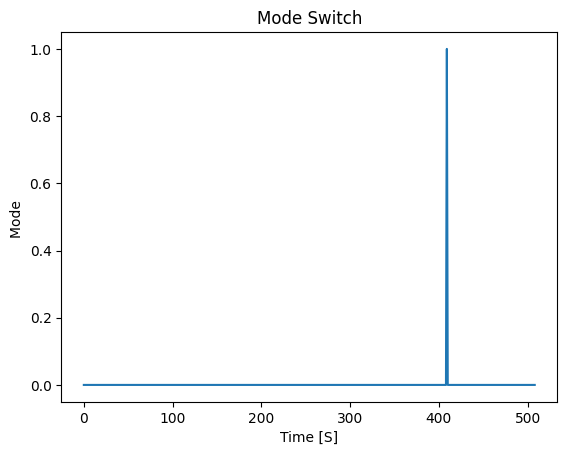

In [52]:
plt.plot(Data['Mode Switch'].astype(int))
plt.title('Mode Switch')
plt.xlabel('Time [S]')
plt.ylabel('Mode ')
plt.show()

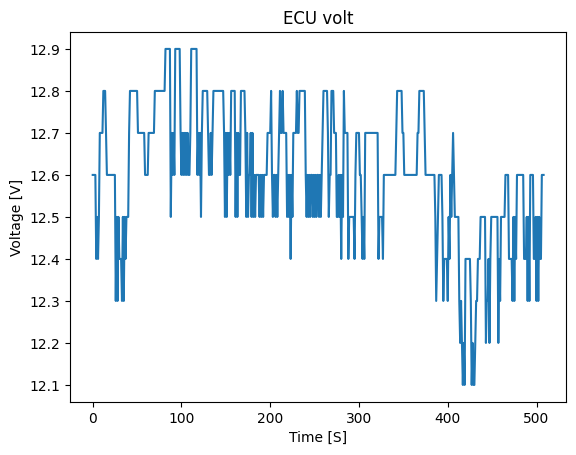

In [47]:
plt.plot(Data['ECU volt'].astype(float)/10)
plt.title('ECU volt')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

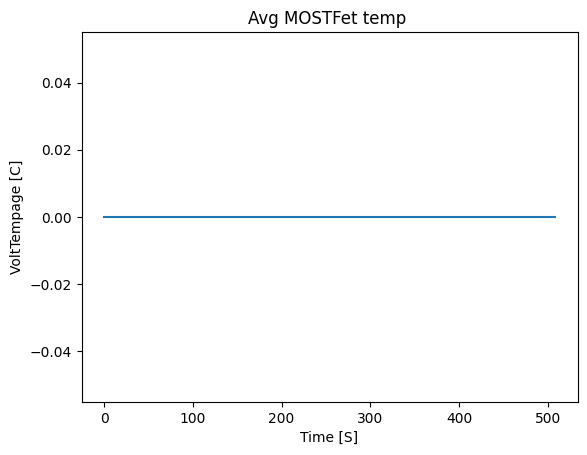

In [45]:
plt.plot(Data['Avg MOSTFet temp'].astype(float))
plt.title('Avg MOSTFet temp ')
plt.xlabel('Time [S]')
plt.ylabel('Temp [C]')
plt.show()

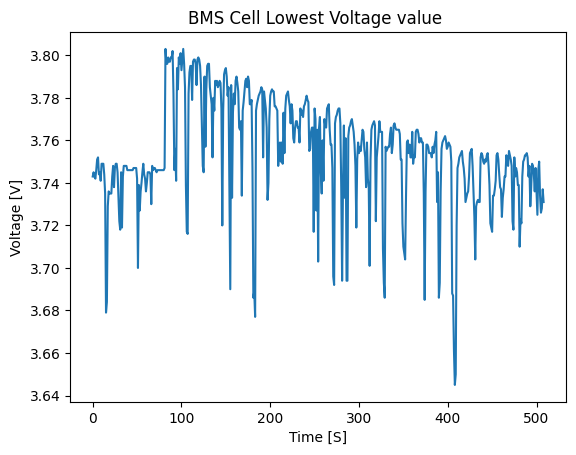

In [42]:
plt.plot((Data['Avg MOSTFet temp'].astype(float)+200)/100)
plt.title('Avg MOSTFet temp ')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

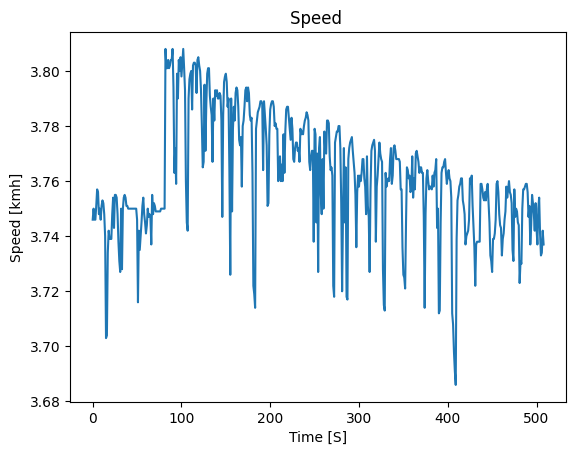

In [41]:
plt.plot((Data['BMS Cell Highest Voltage value'].astype(float)+200)/100)
plt.title('Speed ')
plt.xlabel('Time [S]')
plt.ylabel('Speed [kmh]')
plt.show()

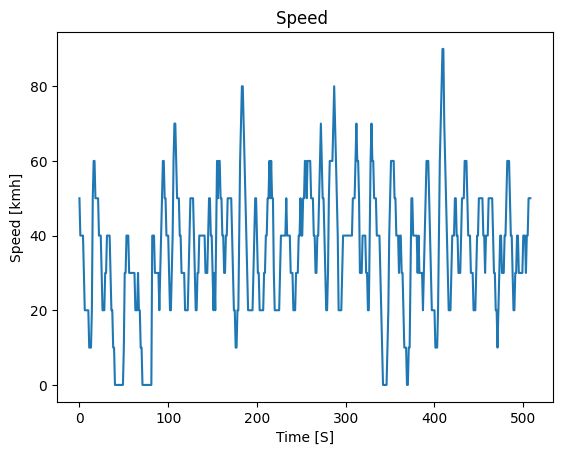

In [55]:
plt.plot(Data['Speed kmh'].astype(float)*10)
plt.title('Speed ')
plt.xlabel('Time [S]')
plt.ylabel('Speed [kmh]')
plt.show()

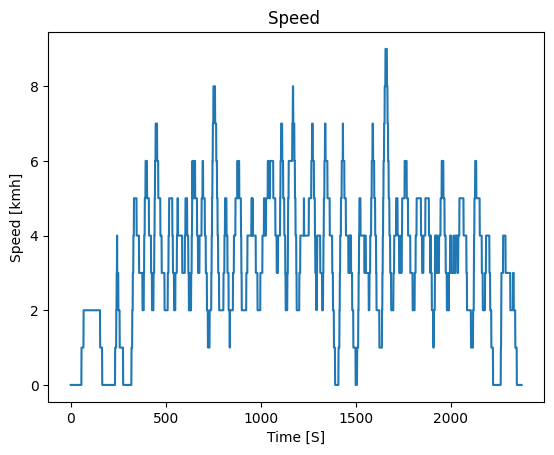

In [34]:
plt.plot(Data[13].astype(float))
plt.title('Speed ')
plt.xlabel('Time [S]')
plt.ylabel('Speed [kmh]')
plt.show()

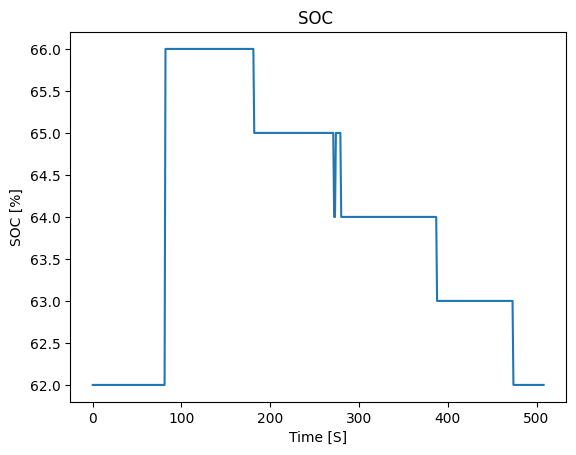

In [29]:
plt.plot(Data['SOC'].astype(float))
plt.title('SOC ')
plt.xlabel('Time [S]')
plt.ylabel('SOC [%]')
plt.show()


## Ploting the temp of the Motor

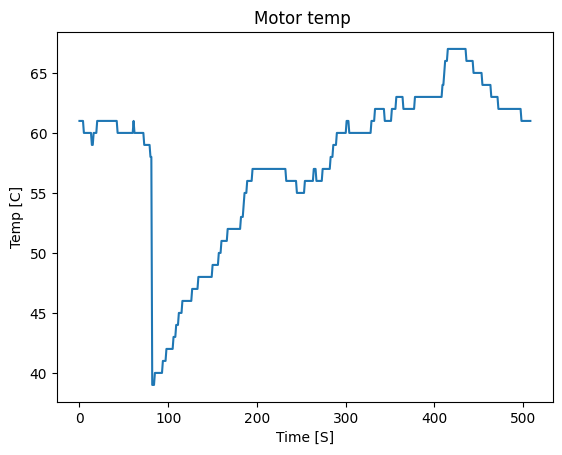

In [30]:
plt.plot(Data['Motor temp'].astype(float))
plt.title('Motor temp ')
plt.xlabel('Time [S]')
plt.ylabel('Temp [C]')
plt.show()

## Battery pack Volatge 

1       100.4
2       100.4
3       100.4
4       100.4
5       100.4
        ...  
4000     96.7
4001     96.7
4002     96.7
4003     96.7
4004     96.7
Name: 29, Length: 4004, dtype: float64


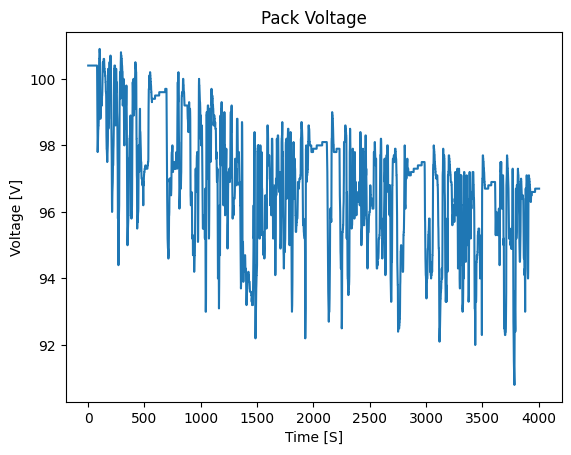

In [71]:
Pack_Volatge =(Data.iloc[1:, 29].astype('float64'))/10.0
#Plot data in column 30
plt.plot(Pack_Volatge)
print(Pack_Volatge)
plt.title('Pack Voltage')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

2       100.4
7       100.4
12      100.4
17      100.4
22      100.4
        ...  
3982     96.7
3987     96.7
3992     96.7
3997     96.7
4002     96.7
Name: 29, Length: 801, dtype: float64


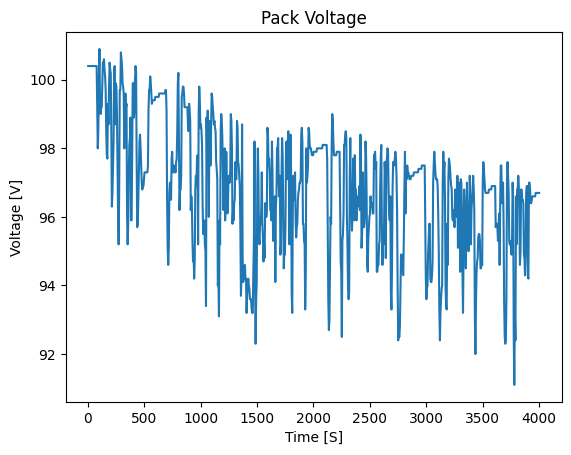

In [72]:
plt.plot(Pack_Volatge)
print(Pack_Volatge)
plt.title('Pack Voltage')
plt.xlabel('Time [S]')
plt.ylabel('Voltage [V]')
plt.show()

### Battery Pack SOC

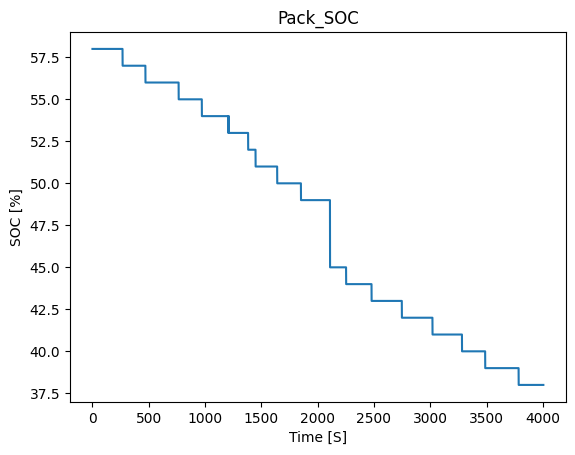

In [3]:
Pack_SOC =(Data.iloc[:, 69].astype('float64'))
# Plot data in column 30
plt.plot(Pack_SOC)
plt.title('Pack_SOC')
plt.xlabel('Time [S]')
plt.ylabel('SOC [%]')
plt.show()

### Battery Pack discharge Current 

0       0.5
1       0.5
2       0.4
3       0.4
4       0.5
       ... 
995    -9.5
996    21.9
997    18.1
998    10.0
999     5.5
Name: 62, Length: 1000, dtype: float64
1       0.5
5       0.6
9       0.6
13      0.5
17      0.6
       ... 
981   -22.9
985   -34.0
989   -22.4
993   -12.1
997    18.1
Name: 62, Length: 250, dtype: float64


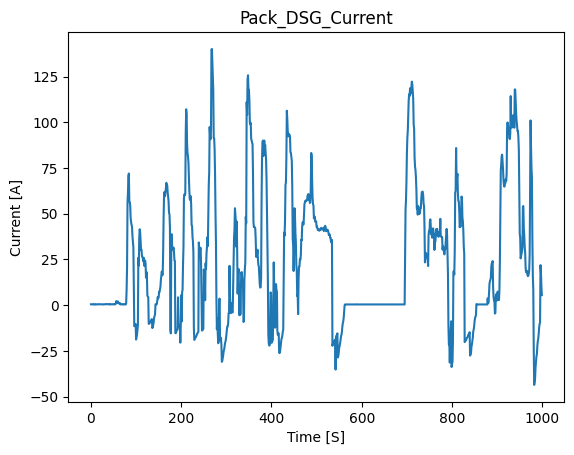

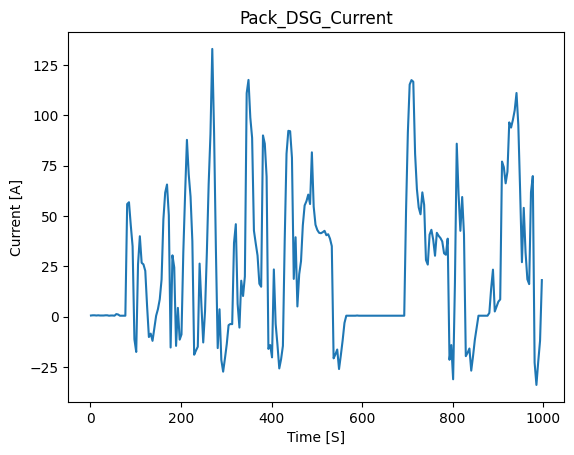

In [80]:
Pack_DSG_Current =(Data.iloc[0:1000, 62].astype('float64'))/10
# Plot data in column 30
plt.plot(Pack_DSG_Current)
print(Pack_DSG_Current[:])
print(Pack_DSG_Current[1::4])
plt.title('Pack_DSG_Current')
plt.xlabel('Time [S]')
plt.ylabel('Current [A]')
plt.show()
plt.figure()
plt.plot(Pack_DSG_Current[1::4])

plt.title('Pack_DSG_Current')
plt.xlabel('Time [S]')
plt.ylabel('Current [A]')
plt.show()


1       0.5
6       0.4
11      0.4
16      0.5
21      0.5
       ... 
3981    0.4
3986    0.4
3991    0.4
3996    0.4
4001    0.4
Name: 62, Length: 801, dtype: float64


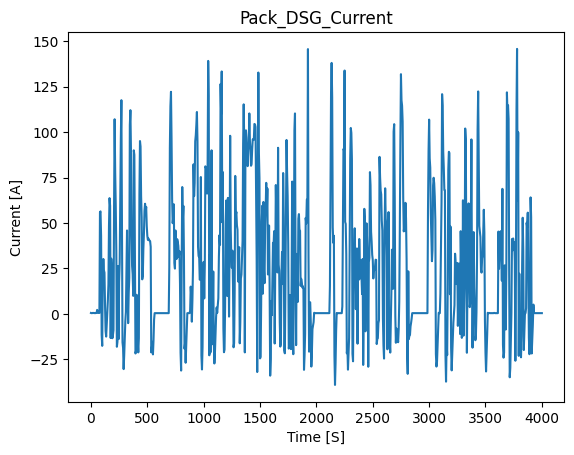

In [76]:
Pack_DSG_Current 
# Plot data in column 30
plt.plot(Pack_DSG_Current[1::5])
print(Pack_DSG_Current[1::5])
plt.title('Pack_DSG_Current')
plt.xlabel('Time [S]')
plt.ylabel('Current [A]')
plt.show()

Total Energy for an hour: 25.239827416666664 kWh
Total Energy: 0        0.000139
1        0.000279
2        0.000390
3        0.000502
4        0.000641
          ...    
4000    27.347811
4001    27.347918
4002    27.348026
4003    27.348133
4004    27.348240
Length: 4005, dtype: float64 kWh


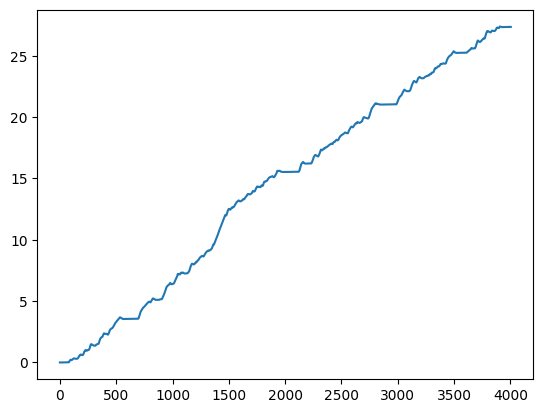

### String Voltages 

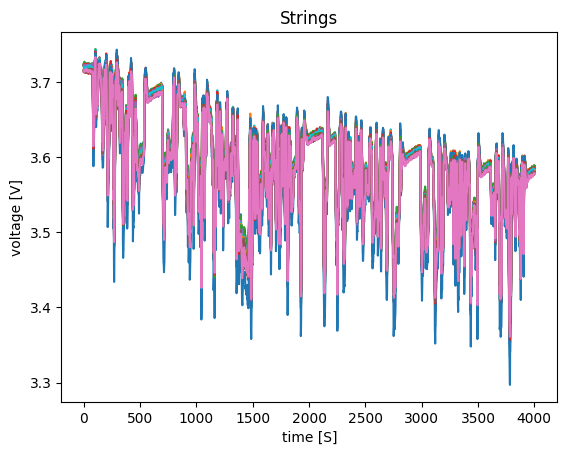

In [81]:
# Strings 
Max_String = Strings.iloc[:, 30:57].max(axis=1)
Min_String = Strings.iloc[:, 30:57].min(axis=1)
plt.plot(Strings)
plt.title('Strings')
plt.xlabel('time [S]')
plt.ylabel('voltage [V]')
plt.show()

In [ ]:
Max_String = Strings.iloc[:, 30:57].max(axis=1)
Min_String = Strings.iloc[:, 30:57].min(axis=1)
plt.plot(Strings)
plt.title('Strings')
plt.xlabel('time [S]')
plt.ylabel('voltage [V]')
plt.show()

### Strong and weak cell 

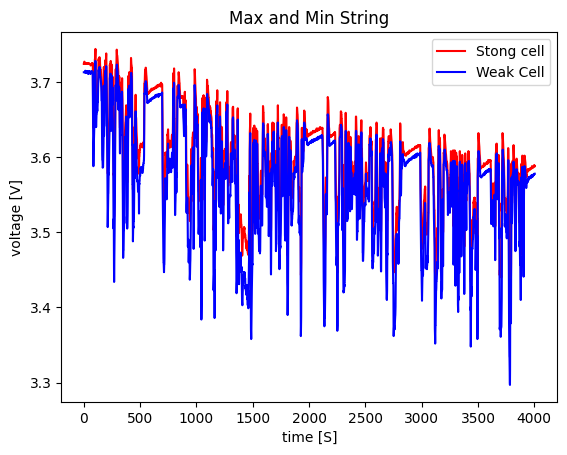

In [6]:
max_String = Strings.max(axis=1)
min_String = Strings.min(axis=1)
# plot the maximum and minimum String voltage
plt.plot(max_String, label='Stong cell', color='red')
plt.plot(min_String, label='Weak Cell', color='blue')

# set the title, x-axis label, y-axis label, and legend
plt.title('Max and Min String')
plt.xlabel('time [S]')
plt.ylabel('voltage [V]')
plt.legend()

plt.show()

### Delta V (Voltage difference between the highest and lowest cell)

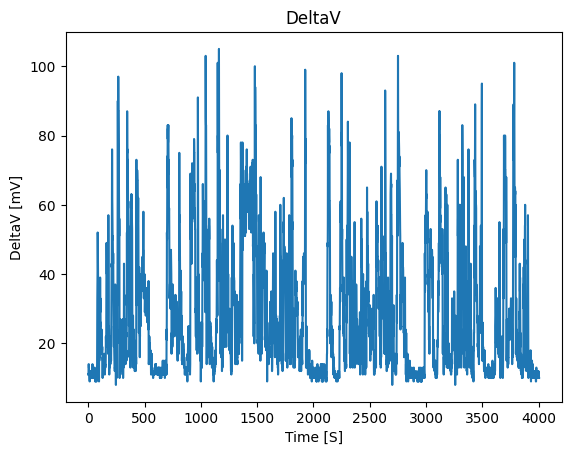

In [7]:
DeltaV = (max_String - min_String)*1000
# Plot data in column 30
plt.plot(DeltaV)
plt.title('DeltaV')
plt.xlabel('Time [S]')
plt.ylabel('DeltaV [mV]')
plt.show()

### Temperature values 

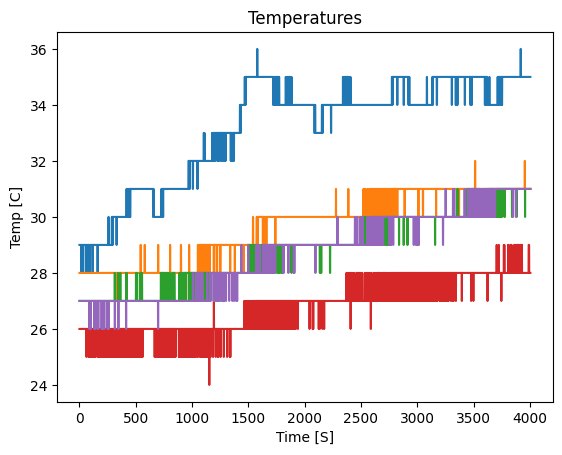

In [8]:
# plot the 4 temp probes values 
plt.plot(Temperatures)
# set the title, x-axis label, y-axis label, and legend
plt.title('Temperatures')
plt.xlabel('Time [S]')
plt.ylabel('Temp [C]')
plt.show()

### MAX and MIN Temperature values 

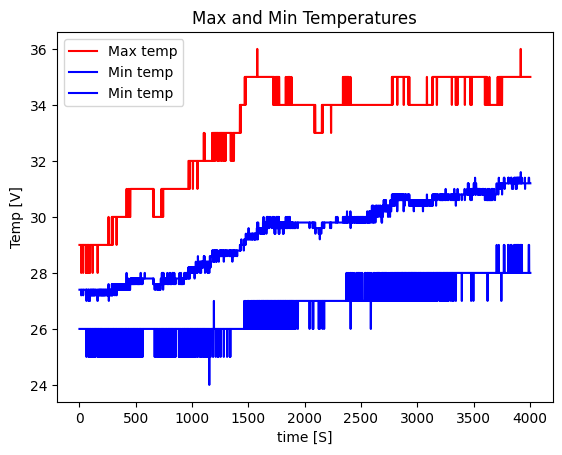

In [15]:
plt.plot(Temperatures.max(axis=1),label='Max temp', color='red')
plt.plot(Temperatures.min(axis=1),label='Min temp', color='blue')
plt.plot(Temperatures.mean(axis=1),label='Min temp', color='blue')
# set the title, x-axis label, y-axis label, and legend
plt.title('Max and Min Temperatures')
plt.xlabel('time [S]')
plt.ylabel('Temp [V]')
plt.legend()
plt.show()

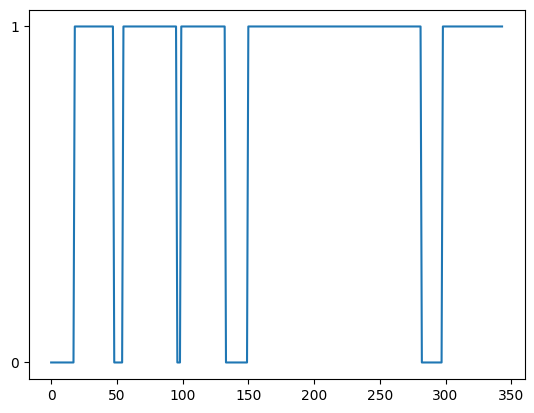

In [22]:
# MCU_Voltage = (Data.iloc[:, 81].astype(float))/10  # the MCU volatge
# RPM = Data.iloc[:, 83].astype(float)               # the RPM of the vehicle
# Motor_Temp = Data.iloc[:, 84].astype(float)
# Invt_Temp = Data.iloc[:, 85].astype(float)
# Speed = Data.iloc[:, 13].astype(float)
# Chrg_Voltage = (Data.iloc[:, 94].astype(float))/10
# Chrg_Current = (Data.iloc[:, 95].astype(float))/10
# Odometer = (Data.iloc[:, 11].astype(float))*100
# Trip = (Data.iloc[:, 12].astype(float))
# Fan_speed =(Data.iloc[:, 102].astype(float))
# Riding_Mode = (Data.iloc[:, 96].astype(float))
boardTemp  =  Data.iloc[:, 9].astype(int)  # ECU temperature
boardSupplyVoltage =  Data.iloc[:, 10].astype(float)/10
# MCU_MaxRegen =  Data.iloc[:, 91].astype(float)  # Not yet sure.
#The sates of the MCU will have the 
MCU_state = Data.iloc[:, 89].astype(int)
# get the Brake state from the MCU state
Brake_H = []
Run_Receive = []
Run_Send = []
Reverse_receive = []
# for i in MCU_state:
#     Brake_H.append(bin(i)[5])  # Break receive
#     Run_Receive.append(bin(i)[4])
#     Run_Send.append(bin(i)[2])
#     Reverse_receive.append(bin(i)[6])  # Get One when Reverse is trigged
#plt.plot(Brake_H)

# Start with Vehicle inf
vehicleStatuByte2 = Data.iloc[:, 18].astype(int)  # fro the riding mode and BMS, MCU, Throttle
vehicleStatuByte1 = Data.iloc[:, 17].astype(int)  # fro the riding mode and 




City_Mode = []
Pro_Mode = []
ECO_Mode = []
BMS_CON = []
MCU_CON1 = []
for i in vehicleStatuByte2:
    ECO_Mode.append(bin(i)[6])
    City_Mode.append(bin(i)[8])  # City Mode
    Pro_Mode.append(bin(i)[7])
    BMS_CON.append(bin(i)[4])
    MCU_CON1.append(bin(i)[3])
# #print(ECO_Mode)

Storage_Mode = []
Lock_Mode = []
Charger_CON = []
Reverse_Mode3S = []
IsCharging = []
Fast_Charge = []

for i in vehicleStatuByte1:
    Storage_Mode.append(bin(i)[1])
    Lock_Mode.append(bin(i)[2])  # City Mode
    Reverse_Mode3S.append(bin(i)[3])
    Charger_CON.append(bin(i)[4])
    IsCharging.append(bin(i)[5])
    Fast_Charge.append(bin(i)[5])
    
plt.figure()
plt.plot(IsCharging)

In [33]:
# getting your message as int
i = int("140900793d002327", 16)

# getting bit at position 28 (counting from 0 from right)
print((i >> 28) & 1)

# getting bits at position 24-27
bin((i >> 24) & 0b111)

#plt.plot(Data.iloc[:, 89])
# for i in MCU_state:
#     print(bin(i))
j = MCU_state[0]  
print(bin(j))
print(bin((j >>5) & 0b100))
#Set bit 3 to 0

1


'0b101'

1.1122222222222222


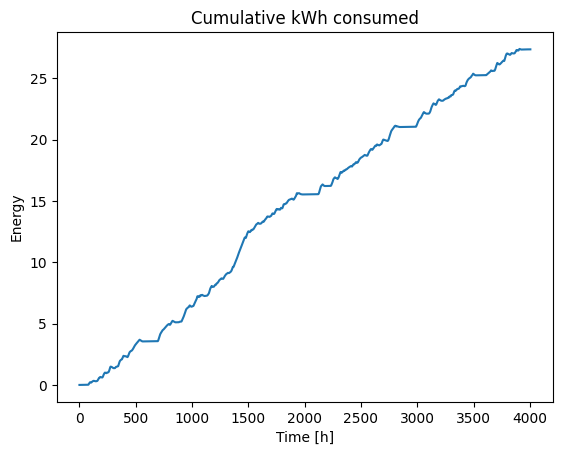

In [27]:
global time
time = list([0])
for col in df.columns:
    Energy =(Pack_Volatge*Pack_DSG_Current*(1/3600000)) 
    #time =col/3600  
total_energy = Energy.cumsum()
for i in  range(0, len(Pack_Volatge)):
    time = (i/3600)
print(time)
plt.plot(total_energy)
plt.title("Cumulative kWh consumed")
plt.xlabel("Time [h]")
plt.ylabel("Energy")
plt.show()

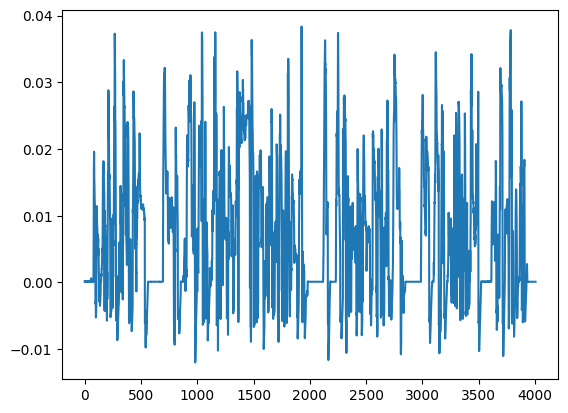

In [15]:
plt.plot(Energy)

In [21]:
import pandas as pd

# Take a DataFrame
df = pd.DataFrame({
    'name': ['apple', 'banana', 'cherry', 'fig', 'mango', 'pear'],
    'quantity': [14, 0, 0, 37, 25, 80]
})

# Select rows whose index is odd
df_odd_rows = df.iloc[1::2]

# Print DataFrame
print(f"Original DataFrame\n{df}\n")
print(f"Rows at odd index\n{df_odd_rows}")

Original DataFrame
     name  quantity
0   apple        14
1  banana         0
2  cherry         0
3     fig        37
4   mango        25
5    pear        80

Rows at odd index
     name  quantity
1  banana         0
3     fig        37
5    pear        80
